In [11]:
import numpy as np
from enviroment import *
from action_value import *
from policy import *
from algorithms import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [12]:
track = Track(4, 4)
track.set_start((np.ones(2) * 3).astype(int), np.arange(2))
track.set_finish(np.arange(2), (np.ones(2) * 3).astype(int))
track.set_boundries_rectangle([2,4], [2,4])

In [4]:
algo = OffPolicyMCControl(track, n_iter = 1000, initial_behaviour_eps=0.01, subsequent_behaviour_eps=0.01)
episodes = algo.train()

Iteration: 0, seconds elapsed: 0.3
Iteration: 1, seconds elapsed: 0.0
Iteration: 2, seconds elapsed: 0.0
Iteration: 3, seconds elapsed: 0.0
Iteration: 4, seconds elapsed: 0.0
Iteration: 5, seconds elapsed: 0.0
Iteration: 6, seconds elapsed: 0.0
Iteration: 7, seconds elapsed: 0.0
Iteration: 8, seconds elapsed: 0.01
Iteration: 9, seconds elapsed: 0.0
Iteration: 10, seconds elapsed: 0.0
Iteration: 11, seconds elapsed: 0.0
Iteration: 12, seconds elapsed: 0.0
Iteration: 13, seconds elapsed: 0.0
Iteration: 14, seconds elapsed: 0.0
Iteration: 15, seconds elapsed: 0.0
Iteration: 16, seconds elapsed: 0.0
Iteration: 17, seconds elapsed: 0.0
Iteration: 18, seconds elapsed: 0.0
Iteration: 19, seconds elapsed: 0.0
Iteration: 20, seconds elapsed: 0.0
Iteration: 21, seconds elapsed: 0.0
Iteration: 22, seconds elapsed: 0.0
Iteration: 23, seconds elapsed: 0.0
Iteration: 24, seconds elapsed: 0.0
Iteration: 25, seconds elapsed: 0.0
Iteration: 26, seconds elapsed: 0.0
Iteration: 27, seconds elapsed: 0.0
I

In [20]:
matrices

[array([[ 1.,  1.,  1.,  2.],
        [ 1.,  1.,  1.,  2.],
        [ 1.,  1., -1., -1.],
        [ 0., 10., -1., -1.]]),
 array([[ 1.,  1.,  1.,  2.],
        [ 1.,  1.,  1.,  2.],
        [ 1., 10., -1., -1.],
        [ 0.,  0., -1., -1.]]),
 array([[ 1.,  1.,  1.,  2.],
        [ 1.,  1., 10.,  2.],
        [ 1.,  1., -1., -1.],
        [ 0.,  0., -1., -1.]])]

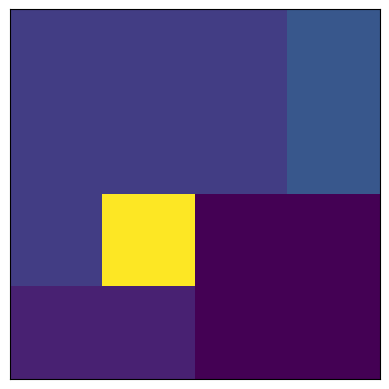

In [7]:
t_policy = algo.t_policy.policy
race = Race(track)
matrices = []
iter_counter = 0
while not race.is_finish:
    action = np.argwhere(t_policy[race.car.vertical_position, race.car.horizontal_position, race.car.vertical_speed, race.car.horizontal_speed] == 1)[0]
    race.take_action(action[0]-1, action[1]-1)
    grid = track.grid.copy()
    grid[race.car.vertical_position, race.car.horizontal_position] = 10
    matrices.append(grid)
    
    if iter_counter > 100:
        print("100 steps")
        break
    
    iter_counter +=1

fig, ax = plt.subplots()

# Function to update the plot
def update(frame):
    ax.clear()
    # Adjust the colormap and value range to reflect different values
    cax = ax.imshow(frame, cmap='viridis', vmin=-1, vmax=10)
    ax.set_xticks([])
    ax.set_yticks([])
    return cax

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=matrices, interval=500)

# Convert the animation to HTML5 video and display it
HTML(ani.to_html5_video())

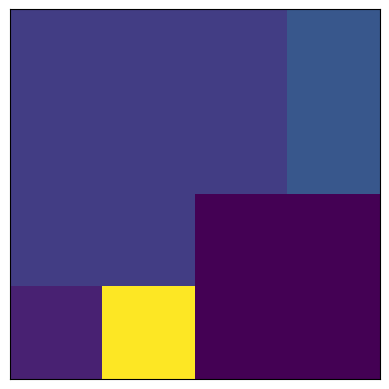

In [5]:
t = 900
matrices = []
for i in range(len(episodes[t])):
    M = track.grid.copy()
    M[tuple(episodes[t][i][0:2])] = 10
    matrices.append(M)

fig, ax = plt.subplots()

# Function to update the plot
def update(frame):
    ax.clear()
    # Adjust the colormap and value range to reflect different values
    cax = ax.imshow(frame, cmap='viridis', vmin=np.min(track.grid), vmax=10)
    ax.set_xticks([])
    ax.set_yticks([])
    return cax

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=matrices, interval=500)

# Convert the animation to HTML5 video and display it
HTML(ani.to_html5_video())

In [13]:
track = Track(32, 17)
track.set_start((np.ones(17) * 31).astype(int), np.arange(17))
track.set_finish(np.arange(32), (np.ones(32) * 16).astype(int))
track.set_boundries_rectangle([7,32], [9,17])
track.set_boundries_rectangle([6,7], [10,17])

track.set_boundries_rectangle([0,4], [0,1])
track.set_boundries_rectangle([0,3], [1,2])
track.set_boundries_rectangle([0,1], [2,3])

track.set_boundries_rectangle([14,32], [0,1])
track.set_boundries_rectangle([22,32], [1,2])
track.set_boundries_rectangle([29,32], [2,3])

track.set_boundries_rectangle([10,12], [10,17])

print(track)

[['X' 'X' 'X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 ['X' 'X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 ['X' 'X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 ['X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 ['X' 

In [14]:
algo = OffPolicyMCControl(track, n_iter = 10000, initial_behaviour_eps=0.5, subsequent_behaviour_eps=0.01)
episodes = algo.train()

Iteration: 0, seconds elapsed: 0.55
Iteration: 1, seconds elapsed: 0.03
Iteration: 2, seconds elapsed: 0.01
Iteration: 3, seconds elapsed: 0.0
Iteration: 4, seconds elapsed: 0.01
Iteration: 5, seconds elapsed: 0.01
Iteration: 6, seconds elapsed: 0.01
Iteration: 7, seconds elapsed: 0.01
Iteration: 8, seconds elapsed: 0.01
Iteration: 9, seconds elapsed: 0.01
Iteration: 10, seconds elapsed: 0.02
Iteration: 11, seconds elapsed: 0.01
Iteration: 12, seconds elapsed: 0.01
Iteration: 13, seconds elapsed: 0.01
Iteration: 14, seconds elapsed: 0.01
Iteration: 15, seconds elapsed: 0.01
Iteration: 16, seconds elapsed: 0.01
Iteration: 17, seconds elapsed: 0.01
Iteration: 18, seconds elapsed: 0.01
Iteration: 19, seconds elapsed: 0.01
Iteration: 20, seconds elapsed: 0.01
Iteration: 21, seconds elapsed: 0.01
Iteration: 22, seconds elapsed: 0.01
Iteration: 23, seconds elapsed: 0.01
Iteration: 24, seconds elapsed: 0.01
Iteration: 25, seconds elapsed: 0.01
Iteration: 26, seconds elapsed: 0.01
Iteration: 2

In [15]:
t_policy = algo.t_policy.policy

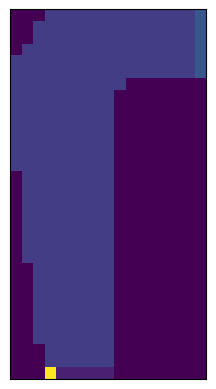

In [16]:
race = Race(track)
matrices = []
iter_counter = 0
grid = track.grid.copy()
grid[race.car.vertical_position, race.car.horizontal_position] = 10
matrices.append(grid)
while not race.is_finish:
    action = np.argwhere(t_policy[race.car.vertical_position, race.car.horizontal_position, race.car.vertical_speed, race.car.horizontal_speed] == 1)[0]
    race.take_action(action[0]-1, action[1]-1)
    grid = track.grid.copy()
    grid[race.car.vertical_position, race.car.horizontal_position] = 10
    matrices.append(grid)
    
    if iter_counter > 100:
        print("100 steps")
        break
    
    iter_counter +=1

fig, ax = plt.subplots()

# Function to update the plot
def update(frame):
    ax.clear()
    # Adjust the colormap and value range to reflect different values
    cax = ax.imshow(frame, cmap='viridis', vmin=-1, vmax=10)
    ax.set_xticks([])
    ax.set_yticks([])
    return cax

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=matrices, interval=500)

# Convert the animation to HTML5 video and display it
HTML(ani.to_html5_video())

In [4]:
a = [True]

if a is not None:
    print("jej")

jej
